In [9]:
import dlib, cv2, os, boto3, awscli
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt

# Load Models

In [10]:
detector = dlib.cnn_face_detection_model_v1('dogHeadDetector.dat')
predictor = dlib.shape_predictor('landmarkDetector.dat')

# Load Dog Image

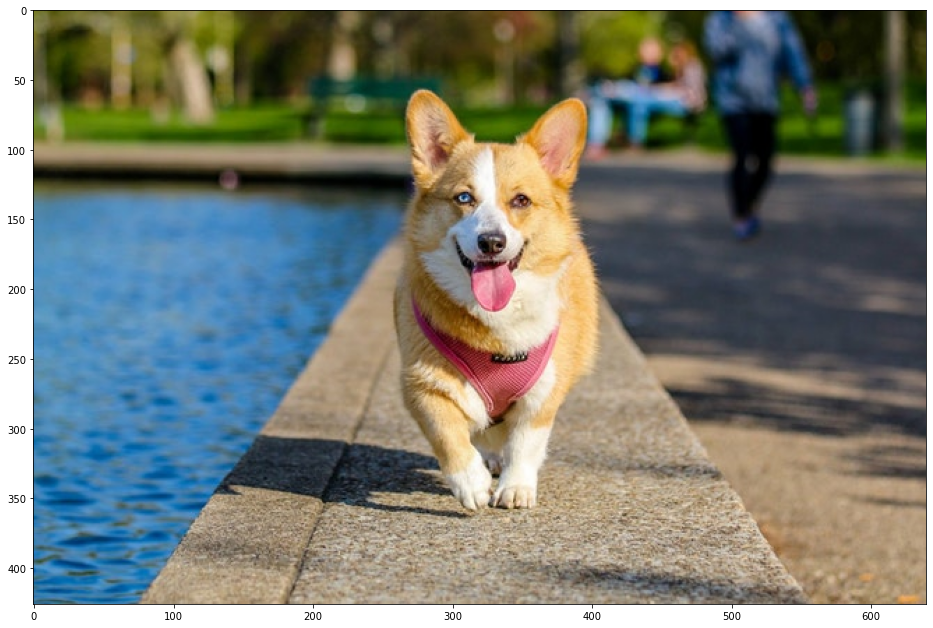

In [11]:
# 강아지 이미지 로드
img_path = 'img/05.jpg'
filename, ext = os.path.splitext(os.path.basename(img_path))
# openCv 이미지 읽기
img = cv2.imread(img_path)
# openCv 컬러변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, dsize=None, fx=0.5, fy=0.5)

plt.figure(figsize=(16, 16))
plt.imshow(img)

# Detect Faces

Detection 0: Left: 273 Top: 101 Right: 371 Bottom: 199 Confidence: 1.036487340927124


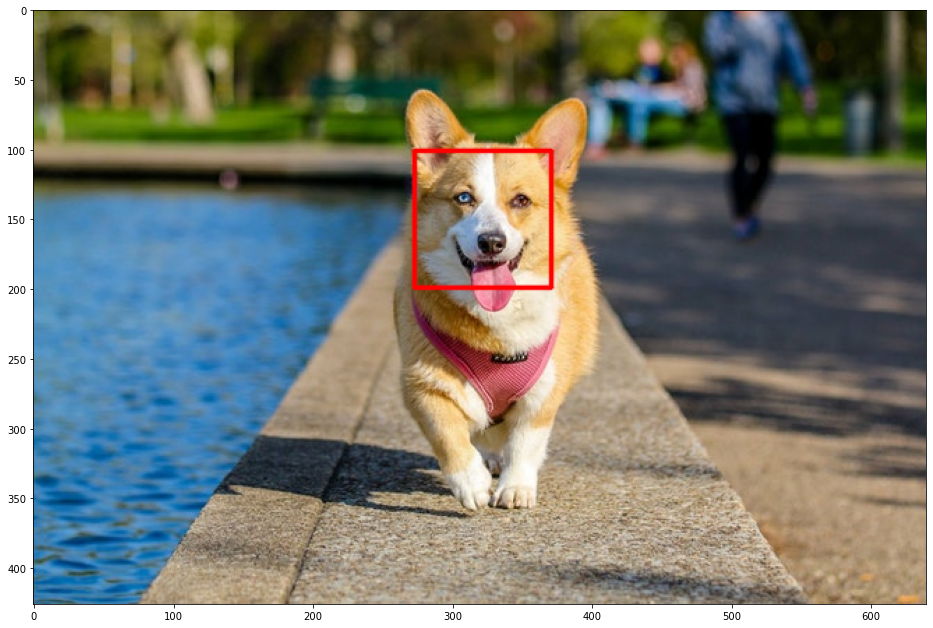

In [12]:
# 강아지 얼굴 인식
dets = detector(img, upsample_num_times=1)

print(dets)

img_result = img.copy()

# 반복문 사용해서 네모난 틀 만들기
for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

    x1, y1 = d.rect.left(), d.rect.top()
    x2, y2 = d.rect.right(), d.rect.bottom()

    cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255,0,0), lineType=cv2.LINE_AA)
    
plt.figure(figsize=(16, 16))
plt.imshow(img_result)

# Detect Landmarks

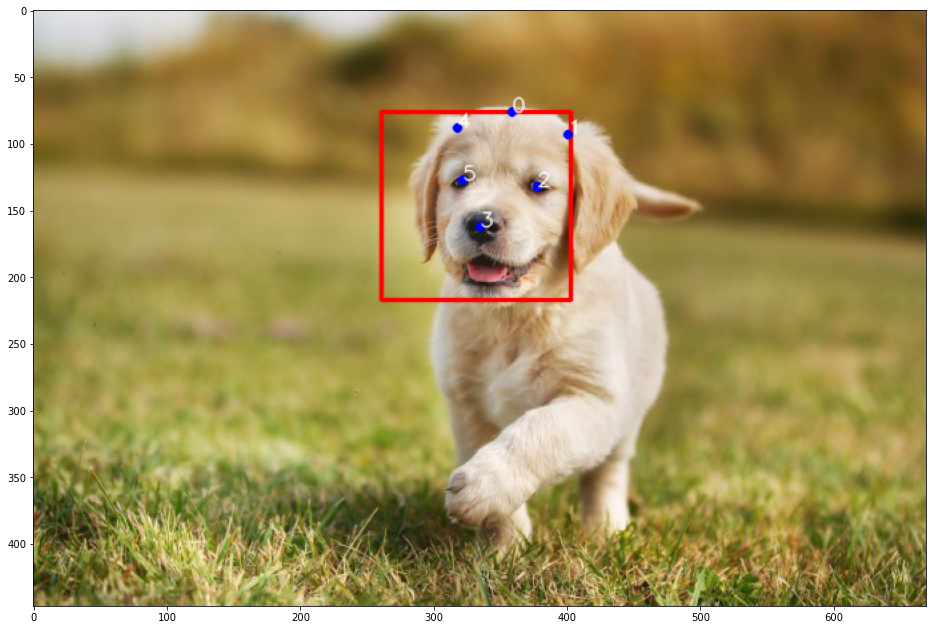

In [14]:
# 강아지 눈코입귀 인식
shapes = []

for i, d in enumerate(dets):
    shape = predictor(img, d.rect)
    shape = face_utils.shape_to_np(shape)
    
    for i, p in enumerate(shape):
        shapes.append(shape)
        cv2.circle(img_result, center=tuple(p), radius=3, color=(0,0,255), thickness=-1, lineType=cv2.LINE_AA)
        cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1, cv2.LINE_AA)

img_out = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)
cv2.imwrite('img/%s_out%s' % (filename, ext), img_out)
plt.figure(figsize=(16, 16))
plt.imshow(img_result)